### All our imports

In [15]:
import pandas as pd

### Let's see our raw data

In [16]:
df = pd.DataFrame(pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv'))
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


### Naive AOV in the problem statement

In [17]:
total_revenue = df['order_amount'].sum()
number_of_orders = len(df)
AOV = round(total_revenue / number_of_orders, 2)
print("Average Order Value: ", AOV)

Average Order Value:  3145.13


It seems as though the AOV to be very sensitive to rows with high value of order amount.

### Check if there are any null values present

In [18]:
df.isnull().any(axis=1).sum()

0

No null values, we can move on, replicated values would be expected.

### Let's make a chart of the amount paid per order by the total amount of items ordered.

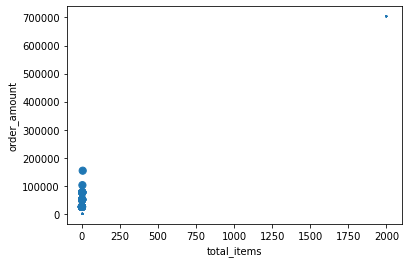

In [19]:
df.plot.scatter(x='total_items', y='order_amount', s=(df['order_amount'] / df['total_items']) * 0.002)

Let's zoom in a bit

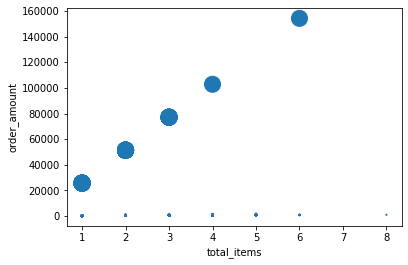

In [20]:
temp_df = df.drop(df[df['order_amount'] > 600000].index)
temp_df.plot.scatter(x='total_items', y='order_amount', s=(temp_df['order_amount'] / temp_df['total_items']) * 0.01)

As you can see from the charts, some sneakers are being charged very highly, for example, one sneaker is being charged close to \$25,000.

Let's check out what's happening

In [21]:
df[df['order_amount'] > 20000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


We can see here that sneakers in some orders have price of \\$25,725 per sneaker, we can also notice a very large order of sneakers (2000 sneakers) worth \\$352 per sneaker. All of these large order_amount orders are causing the AOV value to be extremely high.

### So what would be a better way to evaluate this data?
From what we have seen it seems like most of the outliers lie within \\$20,000 and \\$700,000. The orders over \\$700,000 are valid since those orders are selling high number of sneakers at a high but fair price. So if we can ignore the outliers then our data would provide better metrics, so let's recalculate our AOV.

In [22]:
temp_df = df[(df['order_amount'] <= 20000) | (df['order_amount'] >= 700000)]
total_revenue = temp_df['order_amount'].sum()
number_of_orders = len(temp_df)
AOV = round(total_revenue / number_of_orders, 2)
print("Average Order Value: ", AOV)

Average Order Value:  2717.37


Hmmm it's still too high as the few \\$700,000+ orders are heavily affecting the AOV. Let's try ignoring these orders as well.

In [23]:
temp_df = df[df['order_amount'] <= 20000]
total_revenue = temp_df['order_amount'].sum()
number_of_orders = len(temp_df)
AOV = round(total_revenue / number_of_orders, 2)
print("Average Order Value: ", AOV)

Average Order Value:  302.58


There we go! Much better than all our previous values, but since it doesn't utilize all the valid data rows, we will not report this AOV.


### Metrics to report for this dataset
Some other useful metrics we can report alongside AOV for this dataset are: Average Revenue Per User, and Average Revenue Per Store.

#### Average Revenue Per User:

In [24]:
user_agg = df[(df['order_amount'] <= 20000) | (df['order_amount'] >= 700000)]
user_agg = user_agg[['user_id', 'order_amount']].copy()
user_agg = user_agg.groupby('user_id', as_index=False).sum()
user_agg

,user_id,order_amount
0,607,11968000
1,700,4790
2,701,5162
3,702,5286
4,703,6091
...,...,...
296,995,5316
297,996,5312
298,997,3511
299,998,2620


In [25]:
print("Average Revenue Per User: ", round(user_agg['order_amount'].sum() / len(user_agg), 2))
max_row = user_agg.iloc[user_agg['order_amount'].idxmax()]
print("Highest Earning Shop:\n", "User id:", max_row['user_id'], ", Order amount:", max_row['order_amount'])

Average Revenue Per User:  44723.72
Highest Earning Shop:
 User id: 607 , Order amount: 11968000


#### Average Revenue Per Shop:

In [26]:
shop_agg = df[(df['order_amount'] <= 20000) | (df['order_amount'] >= 700000)]
shop_agg = shop_agg[['shop_id', 'order_amount']].copy()
shop_agg = shop_agg.groupby('shop_id', as_index=False).sum()
shop_agg

,shop_id,order_amount
0,1,13588
1,2,9588
2,3,14652
3,4,13184
4,5,13064
...,...,...
94,96,16830
95,97,15552
96,98,14231
97,99,18330


In [27]:
print("Average Revenue Per Shop: ", round(shop_agg['order_amount'].sum() / len(shop_agg), 2))
max_row = shop_agg.iloc[shop_agg['order_amount'].idxmax()]
print("Highest Earning Shop:\n", "Shop id:", max_row['shop_id'], ", Order amount:", max_row['order_amount'])

Average Revenue Per Shop:  135978.18
Highest Earning Shop:
 Shop id: 42 , Order amount: 11990176


## Values to Report
Average Order Value: \\$2,717.37 <br>
Average Revenue Per User: \\$44,723.72 <br>
Average Revenue Per Shop: \\$135,978.18

Highest Earning Shop ID: 607 <br>
Highest Earning User ID: 42

Not the best metrics but rather useful when we're not sure what we're looking for. <br>

## <span style="color:orange"> *Thank you very much for taking the time to go through my application and this code, I hope you have a fantastic day!* </span>